In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
print(tf.__version__)

2.4.1


In [5]:
#Loading the Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

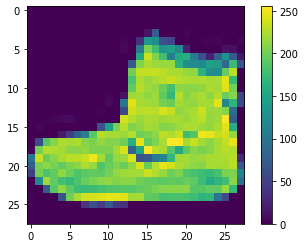

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

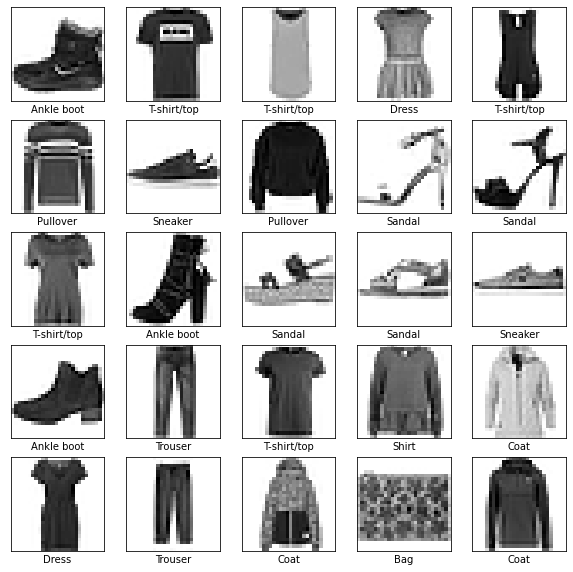

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
#Model Building:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
#Train the model:

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6268 - accuracy: 0.7805
Epoch 2/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.3789 - accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 2s 934us/step - loss: 0.3390 - accuracy: 0.87500s - loss: 0.3391 - 
Epoch 4/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.3091 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.2951 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.2787 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2706 - accuracy: 0.89 - 2s 918us/step - loss: 0.2705 - accuracy: 0.8987
Epoch 8/10
1875/1875 [==============================] - 2s 936us/step - loss: 0.2597 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.2479 - accuracy: 0.9077
Epoc

In [10]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [11]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [12]:
#Prediction:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

9

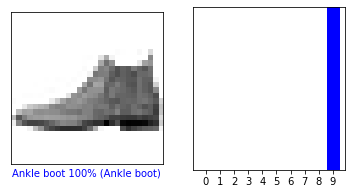

In [13]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

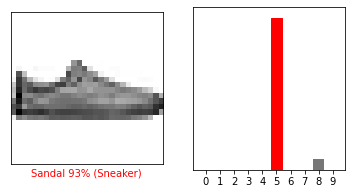

In [14]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

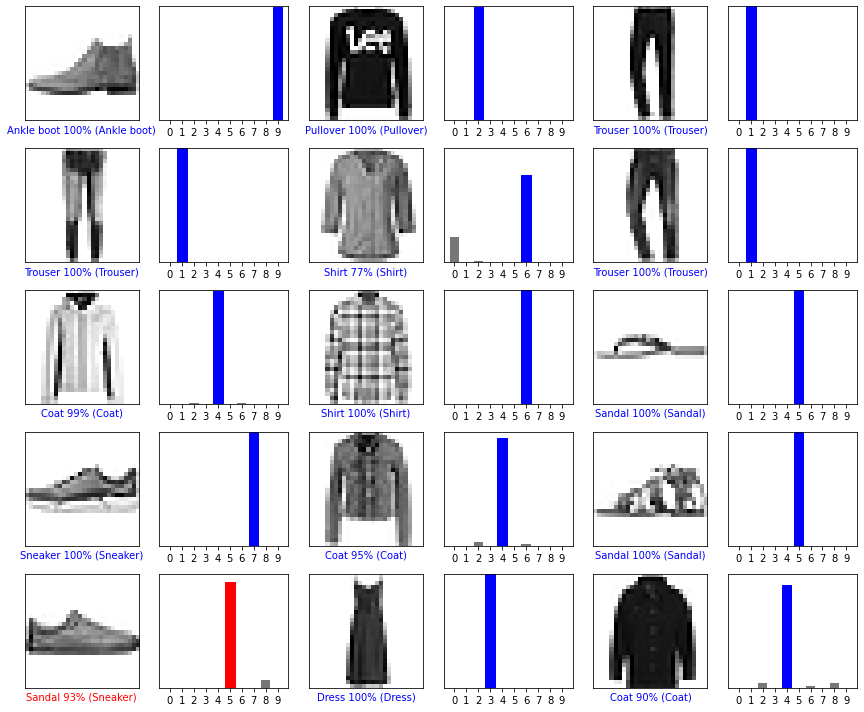

In [16]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [18]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [19]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [20]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.09380046e-04 5.97219496e-10 9.96003211e-01 2.28970354e-09
  3.58998403e-03 4.74188570e-12 2.97434133e-04 5.69957374e-15
  1.45864316e-08 1.08121179e-10]]


2

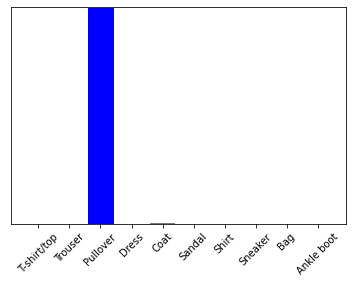

In [21]:

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])